After merge: 155 rows
After dropna: 153 rows
Slope: -0.813453, Intercept: -20.503515


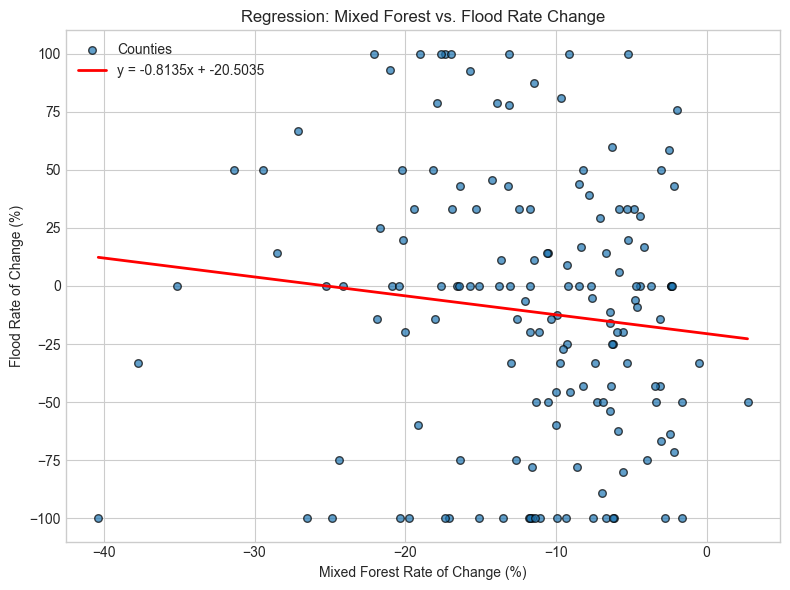

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

flood_df = pd.read_csv(
    "/Users/yanglan/Desktop/qtm498 capstone/Storm event frequency dataset/Storm_0023_normalized.csv"
)
landcover_df = pd.read_csv(
    "/Users/yanglan/Desktop/qtm498 capstone/NLCD dataset/Land_Cover_Change_Summary_with_Rate.csv"
)

flood_df["County_clean"] = flood_df["CZ_NAME"].str.upper()
landcover_df["County_clean"] = (
    landcover_df["County"]
      .str.replace(" County", "", regex=False)
      .str.upper()
)

selected_lc = "Mixed Forest"   
lc_sub = landcover_df[
    landcover_df["LC_Types"].str.lower() == selected_lc.lower()
].copy()

merged = pd.merge(flood_df, lc_sub, on="County_clean", how="inner")
print(f"After merge: {len(merged)} rows")

merged["Change_Rate"]     = pd.to_numeric(merged["Change_Rate"], errors="coerce")
merged["flood_pct"]       = pd.to_numeric(merged["rate_of_change (%)"], errors="coerce")
merged = merged.dropna(subset=["Change_Rate", "flood_pct"])
print(f"After dropna: {len(merged)} rows")

x = merged["Change_Rate"]
y = merged["flood_pct"]
slope, intercept = np.polyfit(x, y, 1)
print(f"Slope: {slope:.6f}, Intercept: {intercept:.6f}")

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=30, alpha=0.7, edgecolors="black", label="Counties")
x_sorted = np.sort(x)
plt.plot(x_sorted, slope*x_sorted + intercept,
         color="red", linewidth=2,
         label=f"y = {slope:.4f}x + {intercept:.4f}")
plt.xlabel(f"{selected_lc} Rate of Change (%)")
plt.ylabel("Flood Rate of Change (%)")
plt.title(f"Regression: {selected_lc} vs. Flood Rate Change")
plt.legend()
plt.tight_layout()
plt.show()


After merge: 155 rows
After dropna: 155 rows
Dropped 66 counties; now 89 remain
Slope: -13.413934, Intercept: -10.621172


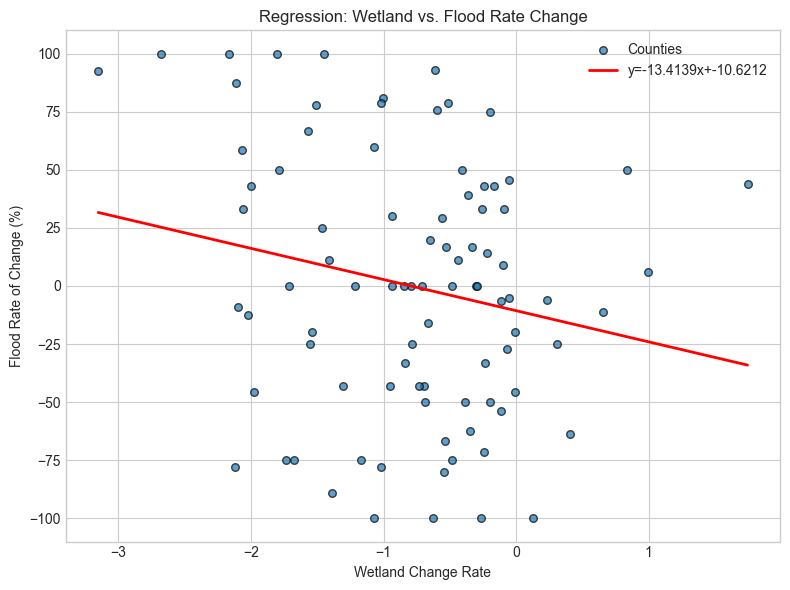

In [ ]:
#drop <5 version:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

flood_df = pd.read_csv(
    "/Users/yanglan/Desktop/qtm498 capstone/Storm event frequency dataset/Storm_0023_normalized.csv"
)
landcover_df = pd.read_csv(
    "/Users/yanglan/Desktop/qtm498 capstone/NLCD dataset/Land_Cover_Change_Summary_with_Rate.csv"
)

flood_df["County_clean"] = flood_df["CZ_NAME"].str.upper()
landcover_df["County_clean"] = (
    landcover_df["County"]
      .str.replace(" County", "", regex=False)
      .str.upper()
)

selected_lc = "Wetland"   
lc_sub = landcover_df[
    landcover_df["LC_Types"].str.lower() == selected_lc.lower()
].copy()

merged = pd.merge(flood_df, lc_sub, on="County_clean", how="inner")
print(f"After merge: {len(merged)} rows")

to_num = ["Change_Rate", "rate_of_change (%)", "sum_2000_2005", "sum_2018_2023"]
for col in to_num:
    merged[col] = pd.to_numeric(merged[col], errors="coerce")

merged.dropna(subset=to_num, inplace=True)
print(f"After dropna: {len(merged)} rows")

before = len(merged)
merged = merged[
    (merged["sum_2000_2005"] >= 5) |
    (merged["sum_2018_2023"] >= 5)
]
dropped = before - len(merged)
print(f"Dropped {dropped} counties; now {len(merged)} remain")

x = merged["Change_Rate"]
y = merged["rate_of_change (%)"]
slope, intercept = np.polyfit(x, y, 1)
print(f"Slope: {slope:.6f}, Intercept: {intercept:.6f}")

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=30, alpha=0.7, edgecolors="black", label="Counties")
x_sorted = np.sort(x)
plt.plot(x_sorted, slope*x_sorted + intercept,
         color="red", linewidth=2,
         label=f"y={slope:.4f}x+{intercept:.4f}")
plt.xlabel(f"{selected_lc} Change Rate")
plt.ylabel("Flood Rate of Change (%)")
plt.title(f"Regression: {selected_lc} vs. Flood Rate Change")
plt.legend()
plt.tight_layout()
plt.show()
